# DAY - LINEAR REGRESSION ASSIGNMENT

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
day = pd.read_csv("day(assignment2).csv")

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01/01/18,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02/01/18,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03/01/18,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04/01/18,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05/01/18,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [4]:
day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
725,726,27/12/19,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,727,28/12/19,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,728,29/12/19,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,729,30/12/19,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796
729,730,31/12/19,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,2729


In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.0+ KB


In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [7]:
day.shape

(730, 14)

In [8]:
day.isnull().sum(axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [9]:
num_cols = day._get_numeric_data().columns

In [10]:
num_cols

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [11]:
day.drop(['instant', 'atemp', 'dteday'], axis = 1, inplace = True)

In [12]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [13]:
day.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


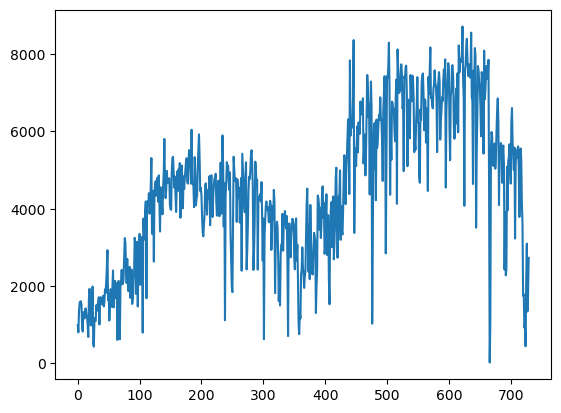

In [14]:

plt.plot(day.cnt)

<Axes: xlabel='season', ylabel='cnt'>

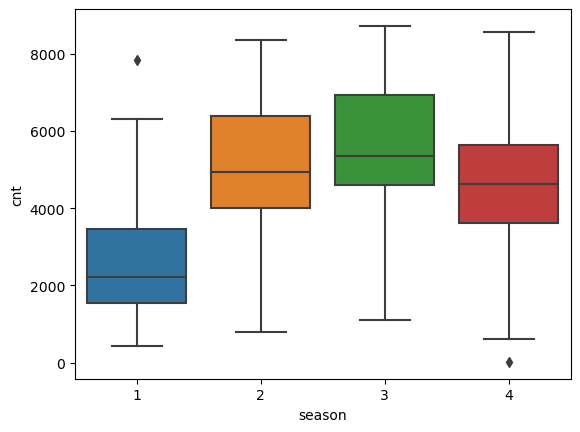

In [15]:
sns.boxplot(x = 'season', y = 'cnt', data = day)



<Axes: xlabel='mnth', ylabel='cnt'>

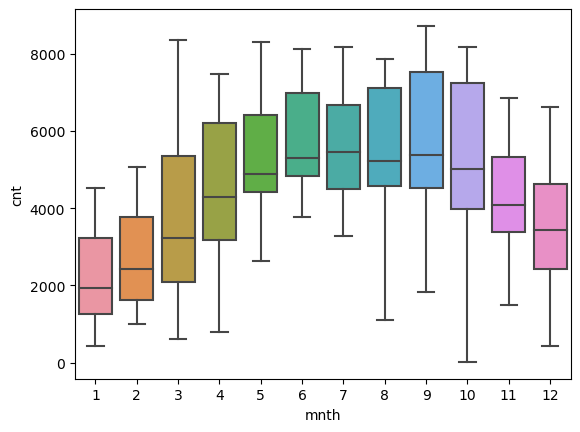

In [16]:
sns.boxplot(x = 'mnth', y = 'cnt', data = day)


<Axes: xlabel='weekday', ylabel='cnt'>

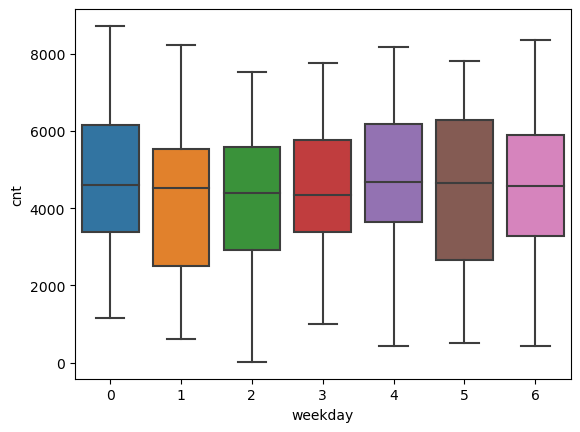

In [17]:

sns.boxplot(x = 'weekday', y = 'cnt', data = day)


<Axes: xlabel='weathersit', ylabel='cnt'>

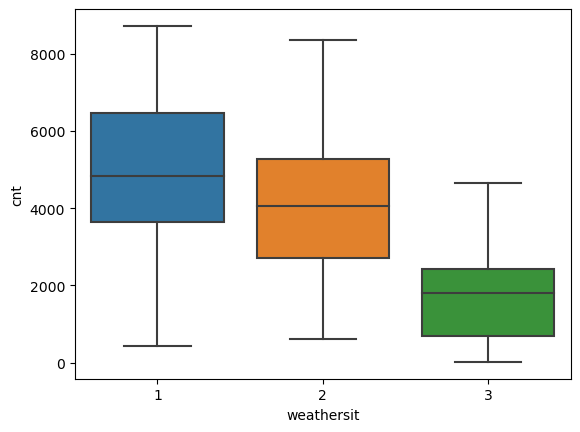

In [18]:

sns.boxplot(x = 'weathersit', y = 'cnt', data = day)


<Axes: xlabel='holiday', ylabel='cnt'>

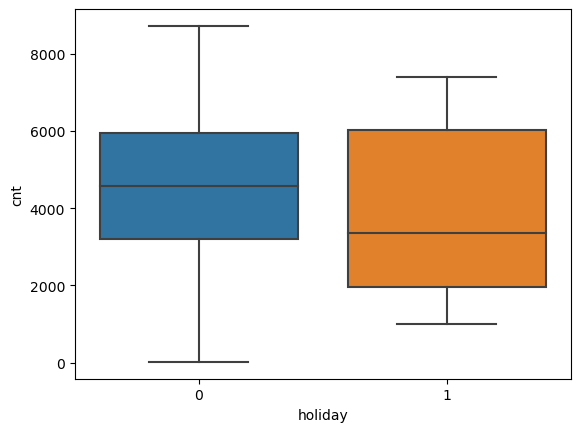

In [19]:

sns.boxplot(x = 'holiday', y = 'cnt', data = day)


<Axes: xlabel='workingday', ylabel='cnt'>

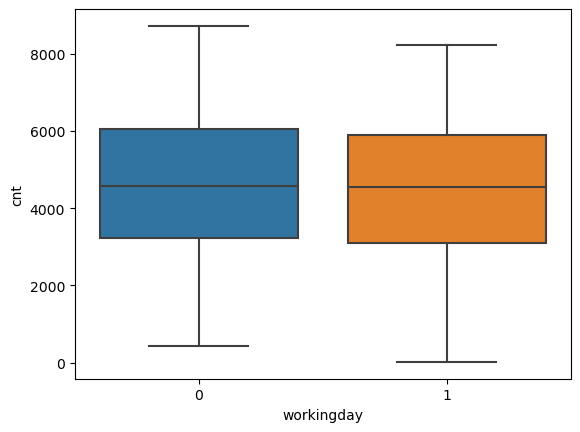

In [20]:

sns.boxplot(x = 'workingday', y = 'cnt', data = day)


<Axes: xlabel='yr', ylabel='cnt'>

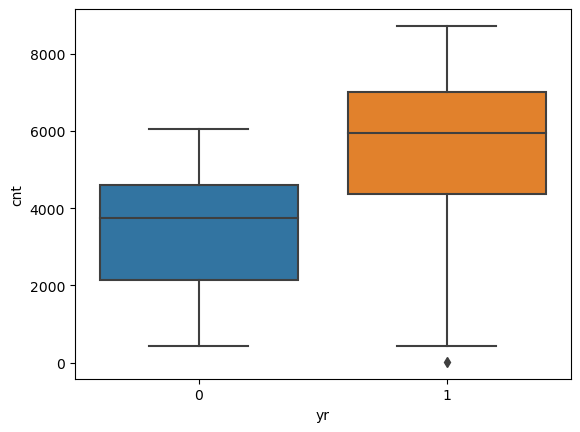

In [21]:

sns.boxplot(x = 'yr', y = 'cnt', data = day)

In [22]:
day.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.128565,-0.158186,0.627044
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,1.000000,-0.248506,-0.098543
windspeed,-2.296069e-01,-1.162435e-02,-2.080131e-01,0.006257,-0.017230,-0.002453,0.039769,-0.158186,-0.248506,1.000000,-0.235132


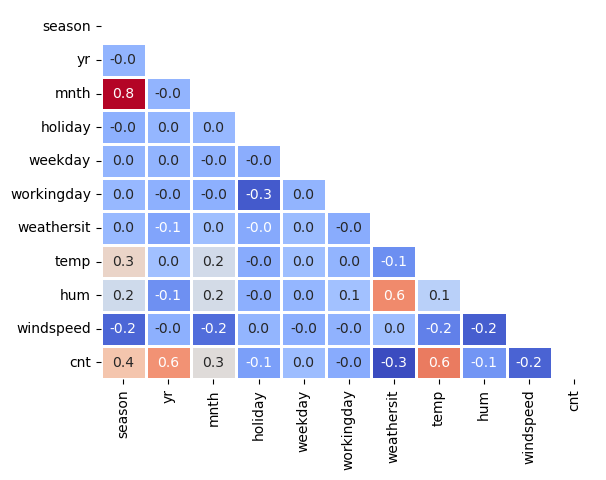

In [23]:
corrMatrix = day.corr()
mask = np.triu(corrMatrix)
sns.heatmap(corrMatrix,
           annot=True,
            fmt='.1f',
            cmap='coolwarm',            
            mask=mask,
            linewidths=1,
            cbar=False)
plt.show()

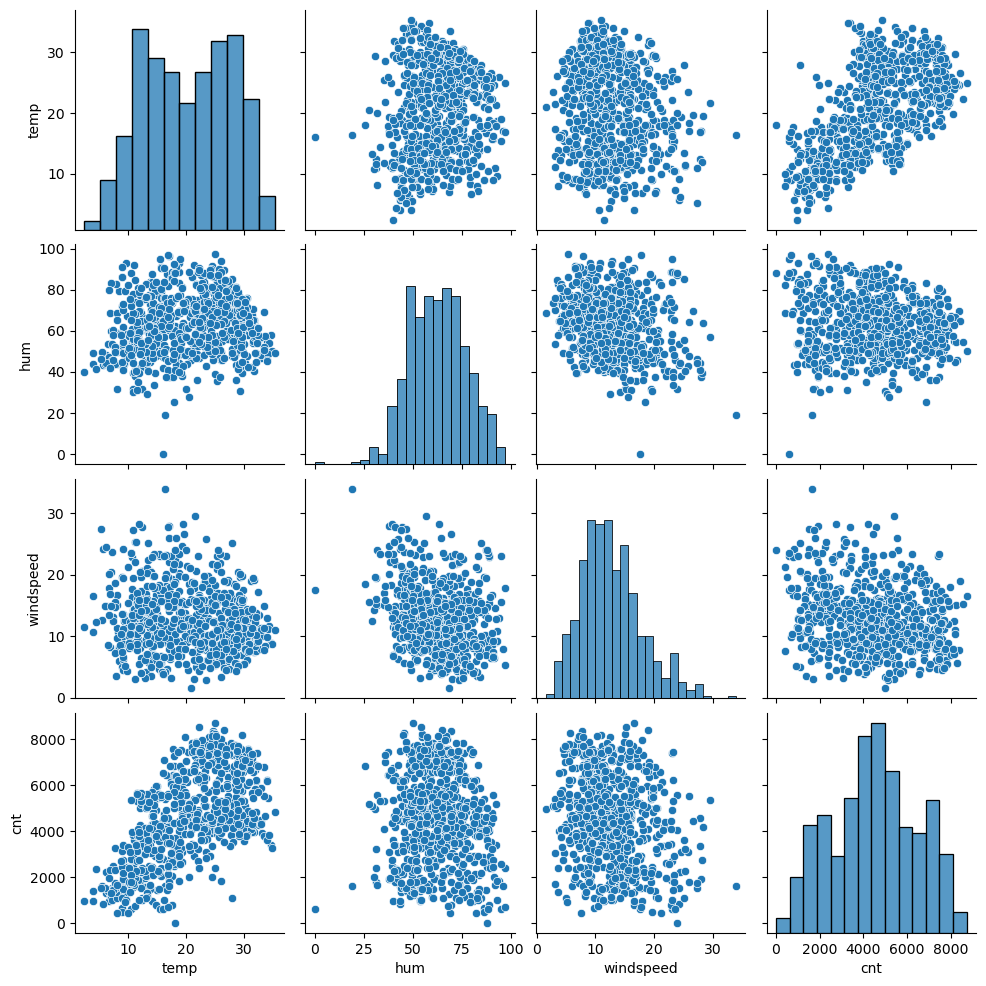

In [24]:
sns.pairplot(data=day,vars=['temp','hum','windspeed','cnt'])

In [25]:
num_col=  day._get_numeric_data().columns
num_col

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [26]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
scale = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed']

day[scale] = scaler.fit_transform(day[scale])
day[scale]

,yr,holiday,workingday,temp,hum,windspeed
0,-1.0,-0.172102,0.669636,-0.827613,1.252343,-0.387833
1,-1.0,-0.172102,0.669636,-0.722069,0.480996,0.748899
2,-1.0,-0.172102,0.669636,-1.635432,-1.338073,0.745931
3,-1.0,-0.172102,0.669636,-1.615560,-0.261577,-0.389769
4,-1.0,-0.172102,0.669636,-1.468226,-1.340294,-0.046477
...,...,...,...,...,...,...
725,1.0,-0.172102,0.669636,-1.319509,0.177576,2.059845
726,1.0,-0.172102,-1.493348,-1.324068,-0.264634,-0.452029
727,1.0,-0.172102,-1.493348,-1.324068,0.880424,-0.853182
728,1.0,-0.172102,0.669636,-1.310404,-1.014341,2.067858


In [28]:
x = day.drop('cnt', 1)
y = day.cnt 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8464\3401397126.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = day.drop('cnt', 1)


In [29]:
from sklearn.model_selection import train_test_split


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=100)

In [31]:
print(x_train.shape) , print(x_test.shape)
print(y_train.shape) , print(y_test.shape)

(510, 10)
(220, 10)
(510,)
(220,)


(None, None)

In [32]:
x_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [34]:
lr.fit(x_train , y_train)

LinearRegression()

In [35]:
print(lr.intercept_)
print(lr.coef_)

4436.626745655254
[ 406.27437572 1016.3281501   -10.70984795 -156.4361181    22.15664821
  -76.18594559 -676.87171701  942.63402197 -129.17716359 -242.29943008]


In [36]:
y_pred = lr.predict(x_test)
y_pred 

array([4003.72151104, 7339.12053922, 3535.43290861, 5514.07837729,
       4870.44042144, 4295.04783778, 5122.65673722, 4171.28728949,
       5838.75993075, 5546.77107723, 6806.52927272, 6535.50419578,
       3963.43938477, 5854.55044119, 2356.45036402, 7334.28859328,
       5558.97003943, 1666.78020367, 5324.49573272, 4712.66921375,
       7471.68525859, 4358.60127818, 6568.50589891, 1594.78388076,
       3263.80074197, 4723.97169465, 7202.78679755, 4014.05491073,
       6519.20262772, 5010.20486657, 7814.7267162 , 6034.1038649 ,
       4092.36936744, 5177.43533751, 2475.07831863, 4008.63662112,
       5020.77977722, 6274.39963175, 1324.24024376, 3809.28953659,
       4660.75904556, 3271.39137229, 5935.63620275, 6008.19896957,
       5028.31433381, 7405.80269791, 1581.08717714, 4378.7313288 ,
       4807.03730425, 1998.28479827, 6615.67972191, 4474.0990918 ,
       5286.20864845, 6702.3700108 , 3362.54642966, 7859.68791839,
       4997.14905623, 4253.88691976, 2090.26751218, 5653.52747

In [37]:
y_test

184    6043
535    6211
299    2659
221    4780
152    4968
       ... 
702    6606
127    4333
640    7572
72     2046
653    7534
Name: cnt, Length: 220, dtype: int64

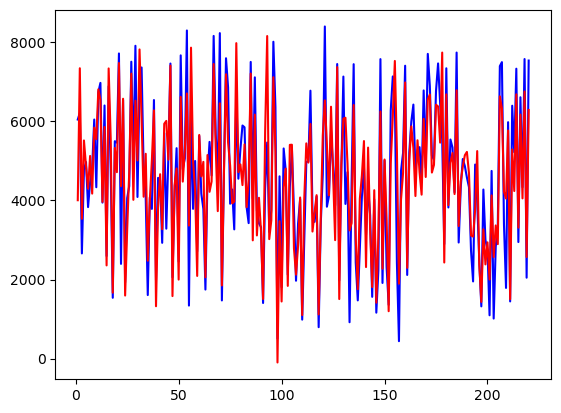

In [38]:
c = [i 
     for i in range(
         1,len(x_test.index)+1,1)] 

plt.plot(c,y_test, color="blue")
plt.plot(c,y_pred, color="red")

In [39]:
error_t = y_test - y_pred
error_t

184    2039.278489
535   -1128.120539
299    -876.432909
221    -734.078377
152      97.559579
          ...     
702     437.895537
127     283.058687
640     819.354776
72     -522.350339
653    1249.151549
Name: cnt, Length: 220, dtype: float64

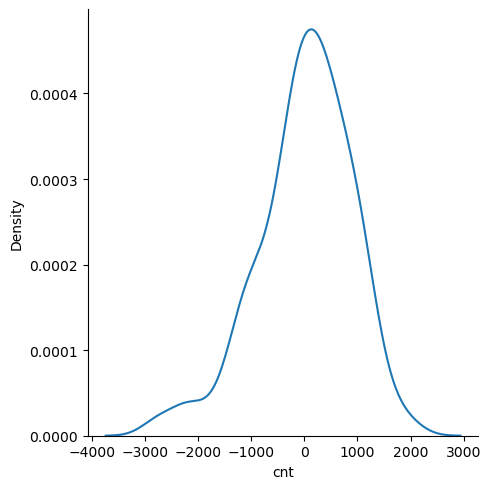

In [40]:
sns.displot( data= day, x = error_t , kind = "kde")

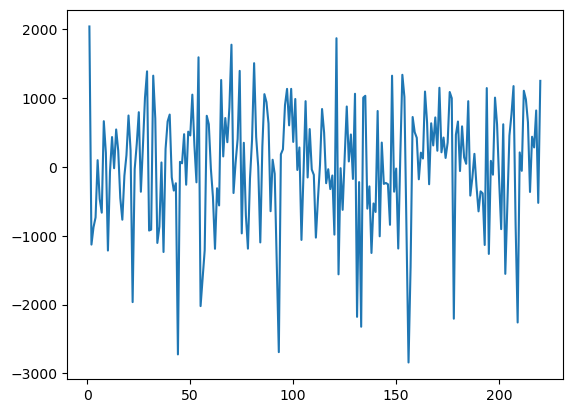

In [41]:

c = [i for i in range(1,len(x_test.index)+1,1)] 

plt.plot(c,error_t)

In [42]:
from sklearn.metrics import mean_squared_error , r2_score
MSE = mean_squared_error  
R_sq = r2_score 

In [43]:
print('Mean_Squared_Error :' ,MSE)
print('R_square_value :',R_sq)
print('RMSE :' , np.sqrt(mean_squared_error(y_test, y_pred)))

Mean_Squared_Error : <function mean_squared_error at 0x0000023F6D5F83A0>
R_square_value : <function r2_score at 0x0000023F6D5F8670>
RMSE : 881.4847420651535
